# In this notebook:

## 1. Set up notebook with visualization libraries and import cleaned data set.
## 2. Use questions defined while cleaning data to choose variables suitable for exploratory visual analysis.
## 3. Create correlations matrix heatmap.
## 3a. Discuss the relationships between variables based on correlation coefficients.
## 4. Create scatterplots for variables with strong correlations.
## 4a. Discuss the output.
## 5. Create pair plot of entire data set.
## 5a. Comment on distribution of variables and note variables to explore further explaining why.
## 6. Create categorical plot and interpret results.
## 7. Revisit questions previously defined and write answers based on exploration conducted thus far. Add new questions that arose during exploratory visual analysis.
## 8. Define any hypotheses for future testing.

In [1]:
# 1. Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# 1. Set path

path = r'C:\Users\Josh Wattay\anaconda3\Flight Delay Analysis'

In [3]:
# 1. Import data

flights = pd.read_csv(os.path.join(path, '02 Data', 'Clean Data', 'Flights_Clean.csv'))

In [5]:
# 1. Check output and shape

flights.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2018-12-02,Comair Inc.,DCA,BTV,False,False,1459,1533.0,34.0,34.0,...,1554.0,1655.0,2.0,1631,26.0,1.0,1.0,1600-1659,2,0.0
1,2018-06-30,Spirit Air Lines,ATL,LAS,False,False,1810,1833.0,23.0,23.0,...,1850.0,1951.0,4.0,1920,35.0,1.0,2.0,1900-1959,7,0.0
2,2018-02-11,Frontier Airlines Inc.,MCI,RSW,False,False,1234,1241.0,7.0,7.0,...,1249.0,1620.0,22.0,1619,23.0,1.0,1.0,1600-1659,5,0.0
3,2018-06-22,United Air Lines Inc.,DEN,CID,False,False,2017,2156.0,99.0,99.0,...,2211.0,33.0,4.0,2303,94.0,1.0,6.0,2300-2359,3,0.0
4,2018-10-19,SkyWest Airlines Inc.,BGM,DTW,False,False,1728,1725.0,0.0,-3.0,...,1733.0,1846.0,7.0,1904,-11.0,0.0,-1.0,1900-1959,2,0.0


In [6]:
flights.tail()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
499995,2022-03-08,Southwest Airlines Co.,DSM,DEN,False,False,1750,1751.0,1.0,1.0,...,1803.0,1829.0,6.0,1840,-5.0,0.0,-1.0,1800-1859,3,0.0
499996,2022-01-16,Republic Airlines,DCA,ATL,False,False,831,826.0,0.0,-5.0,...,856.0,1037.0,8.0,1051,-6.0,0.0,-1.0,1000-1059,3,0.0
499997,2022-02-03,Southwest Airlines Co.,DEN,ORF,False,False,1810,1826.0,16.0,16.0,...,1836.0,2333.0,3.0,2325,11.0,0.0,0.0,2300-2359,7,0.0
499998,2022-01-09,JetBlue Airways,MCO,PSE,False,False,600,557.0,0.0,-3.0,...,615.0,945.0,4.0,949,0.0,0.0,0.0,0900-0959,5,0.0
499999,2022-06-22,Southwest Airlines Co.,DEN,SAT,False,False,1155,1152.0,0.0,-3.0,...,1206.0,1451.0,2.0,1505,-12.0,0.0,-1.0,1500-1559,4,0.0


In [7]:
flights.shape

(500000, 61)

In [8]:
# 1. Display all columns to explore relevant variables for step 2 of this notebook

# Set the option to display all columns
pd.set_option('display.max_columns', 61)
pd.set_option('display.width', 200)

In [9]:
flights.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,Operating_Airline,DOT_ID_Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestCityName,DestState,DestStateFips,DestStateName,DestWac,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2018-12-02,Comair Inc.,DCA,BTV,False,False,1459,1533.0,34.0,34.0,1657.0,26.0,61.0,92.0,84.0,437.0,2018,4,12,2,7,AA,AA_CODESHARE,19805,AA,5129,OH,20397,OH,N546FF,5129,11278,1127805,30852,"Washington, DC",VA,51,Virginia,38,10785,1078502,30785,"Burlington, VT",VT,50,Vermont,16,1.0,2.0,1400-1459,21.0,1554.0,1655.0,2.0,1631,26.0,1.0,1.0,1600-1659,2,0.0
1,2018-06-30,Spirit Air Lines,ATL,LAS,False,False,1810,1833.0,23.0,23.0,1955.0,35.0,241.0,250.0,262.0,1747.0,2018,2,6,30,6,NK,NK,20416,NK,805,NK,20416,NK,N531NK,805,10397,1039707,30397,"Atlanta, GA",GA,13,Georgia,34,12889,1288903,32211,"Las Vegas, NV",NV,32,Nevada,85,1.0,1.0,1800-1859,17.0,1850.0,1951.0,4.0,1920,35.0,1.0,2.0,1900-1959,7,0.0
2,2018-02-11,Frontier Airlines Inc.,MCI,RSW,False,False,1234,1241.0,7.0,7.0,1642.0,23.0,151.0,165.0,181.0,1155.0,2018,1,2,11,7,F9,F9,20436,F9,1938,F9,20436,F9,N311FR,1938,13198,1319801,33198,"Kansas City, MO",MO,29,Missouri,64,14635,1463502,31714,"Fort Myers, FL",FL,12,Florida,33,0.0,0.0,1200-1259,8.0,1249.0,1620.0,22.0,1619,23.0,1.0,1.0,1600-1659,5,0.0
3,2018-06-22,United Air Lines Inc.,DEN,CID,False,False,2017,2156.0,99.0,99.0,37.0,94.0,82.0,106.0,101.0,692.0,2018,2,6,22,5,UA,UA,19977,UA,277,UA,19977,UA,N489UA,277,11292,1129202,30325,"Denver, CO",CO,8,Colorado,82,11003,1100303,31003,"Cedar Rapids/Iowa City, IA",IA,19,Iowa,61,1.0,6.0,2000-2059,15.0,2211.0,33.0,4.0,2303,94.0,1.0,6.0,2300-2359,3,0.0
4,2018-10-19,SkyWest Airlines Inc.,BGM,DTW,False,False,1728,1725.0,0.0,-3.0,1853.0,0.0,73.0,96.0,88.0,378.0,2018,4,10,19,5,DL,DL_CODESHARE,19790,DL,7420,OO,20304,OO,N455SW,7420,10577,1057705,30577,"Binghamton, NY",NY,36,New York,22,11433,1143302,31295,"Detroit, MI",MI,26,Michigan,43,0.0,-1.0,1700-1759,8.0,1733.0,1846.0,7.0,1904,-11.0,0.0,-1.0,1900-1959,2,0.0


## 2. Use questions defined while cleaning data to choose variables suitable for exploratory visual analysis.

#### Based on said questions, the following variables are suitable for exploratory visual analysis: Year, DepDelayMinutes, ArrDelayMinutes, DOT_ID_Operating_Airline, OriginStateFips, DestStateFips, DepTime, ArrTime, Distance, Month, DayofMonth, DayOfWeek

## 3. Create correlations matrix heatmap.

In [17]:
# 3. Lets start by creating a subset of data with the variables suitable for analysis

# List of columns to select
columns_to_select = ['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DOT_ID_Operating_Airline', 'OriginStateFips', 'DestStateFips', 'DepDelayMinutes', 'ArrDelayMinutes', 'DepTime', 'ArrTime', 'Distance']

# Create a new DataFrame with only the selected columns
subset_flights = flights[columns_to_select]

# Display the subset DataFrame
print(subset_flights)

        Year  Month  DayofMonth  DayOfWeek  DOT_ID_Operating_Airline  OriginStateFips  DestStateFips  DepDelayMinutes  ArrDelayMinutes  DepTime  ArrTime  Distance
0       2018     12           2          7                     20397               51             50             34.0             26.0   1533.0   1657.0     437.0
1       2018      6          30          6                     20416               13             32             23.0             35.0   1833.0   1955.0    1747.0
2       2018      2          11          7                     20436               29             12              7.0             23.0   1241.0   1642.0    1155.0
3       2018      6          22          5                     19977                8             19             99.0             94.0   2156.0     37.0     692.0
4       2018     10          19          5                     20304               36             26              0.0              0.0   1725.0   1853.0     378.0
...      ...    ...   

In [18]:
# 3. Now create a correlation matrix with this subset

subset_flights.corr()

,Year,Month,DayofMonth,DayOfWeek,DOT_ID_Operating_Airline,OriginStateFips,DestStateFips,DepDelayMinutes,ArrDelayMinutes,DepTime,ArrTime,Distance
Year,1.000000,-0.246992,-0.001102,0.013400,0.005875,0.011812,0.013792,0.009151,0.005326,-0.002814,0.001581,0.010346
Month,-0.246992,1.000000,0.012302,0.004837,0.005851,0.012018,0.009382,-0.006259,-0.005954,-0.003365,-0.000848,-0.005713
DayofMonth,-0.001102,0.012302,1.000000,0.000129,-0.000336,0.000067,0.000794,0.000785,0.000604,-0.004112,-0.003830,-0.000020
DayOfWeek,0.013400,0.004837,0.000129,1.000000,0.006165,0.000180,-0.003519,0.006354,0.004698,0.003200,0.003913,0.012966
DOT_ID_Operating_Airline,0.005875,0.005851,-0.000336,0.006165,1.000000,0.103702,0.104352,0.023904,0.039938,-0.001430,-0.000512,-0.138365
OriginStateFips,0.011812,0.012018,0.000067,0.000180,0.103702,1.000000,0.035947,0.003525,0.006408,-0.013536,-0.011057,-0.076936
DestStateFips,0.013792,0.009382,0.000794,-0.003519,0.104352,0.035947,1.000000,0.003792,0.006788,0.006935,0.011576,-0.075632
DepDelayMinutes,0.009151,-0.006259,0.000785,0.006354,0.023904,0.003525,0.003792,1.000000,0.978508,0.114863,0.017906,0.010563
ArrDelayMinutes,0.005326,-0.005954,0.000604,0.004698,0.039938,0.006408,0.006788,0.978508,1.000000,0.103558,0.016411,0.005978
DepTime,-0.002814,-0.003365,-0.004112,0.003200,-0.001430,-0.013536,0.006935,0.114863,0.103558,1.000000,0.660942,-0.016985


In [19]:
# 3. Begin creating colored correlation matrix heatmap by defining correlation matrix

correlation_matrix = subset_flights.corr()

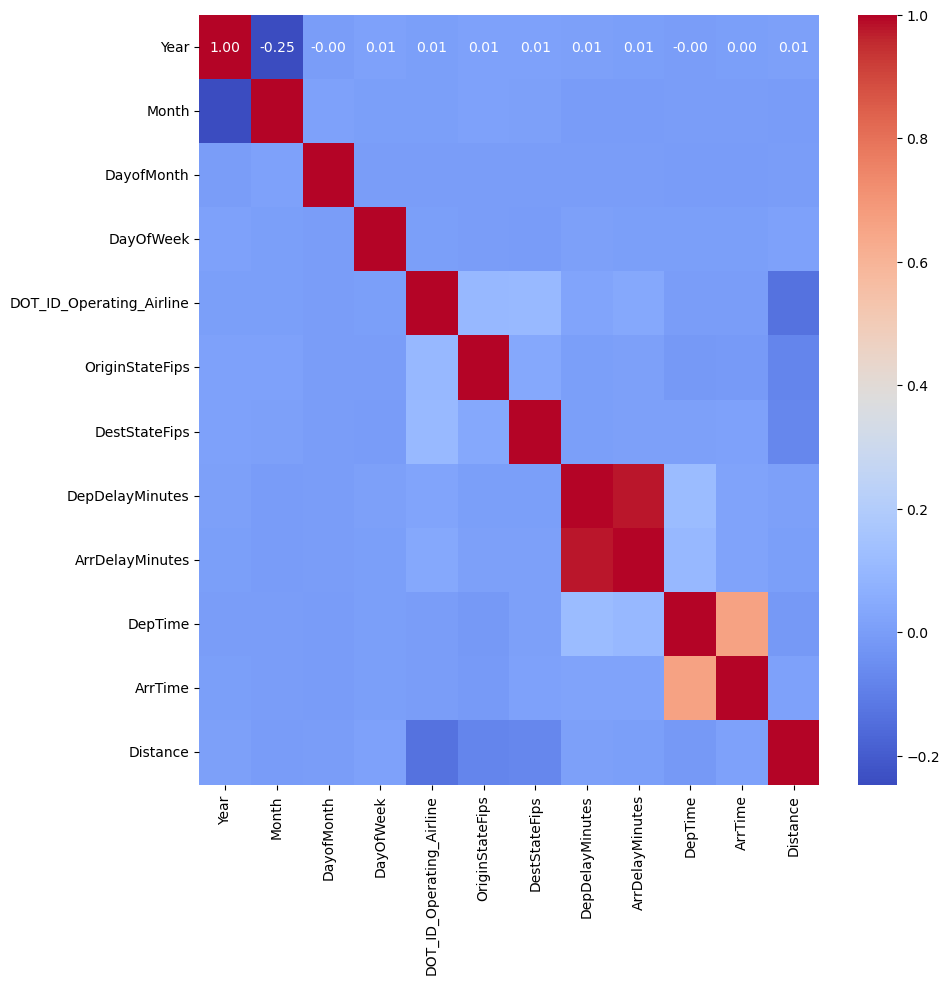

In [27]:
# 3. Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# 3. Create the correlation heatmap in seaborn 
corr = sns.heatmap(subset_flights.corr(), annot = True, fmt=".2f", cmap='coolwarm', ax = ax) 

## 3a. Discuss the relationships between variables based on correlation coefficients.

### There is a strong correlation between Departure Delay Minutes and Arrival Delay Minutes (0.97) which makes sense, given that the longer a flight is delayed in departing from the airport, the longer it will be delayed in arriving to its destination. 

### There is also a fairly strong correlation between Departure Time and Arrival Time (0.66). This is also to be expected, as the later a flight departs, the later it will arrive, or in other words, as departure time increases, so does arrival time. This may get messy with "red-eye" flights or flights that depart late in the evening and arrive early in the morning. On a 24 hour clock that would suggest a lower arrival time than departure time, which may explain why this correlation is not stronger.

### An interesting mild negative correlation between DOT Airline ID and Distance is observed, suggesting that as the DOT Airline ID increases, the Distance of flights decreases. Perhaps this is due to smaller airlines travelling shorter distances being assigned higher DOT Airline IDs?

### Similarlly, there is a slight negative correlation between Origin State Fips and Destination State Fips code and Distance. This indicates that as the State's Fips code increases, the distance in flight decreases. This is fascinating because the state Fips code is alphabetical. The heatmap suggests that states beginning with letters S-W (no states beyond W in the US) have shorter flight Distances!

## 4. Create scatterplots for variables with strong correlations.

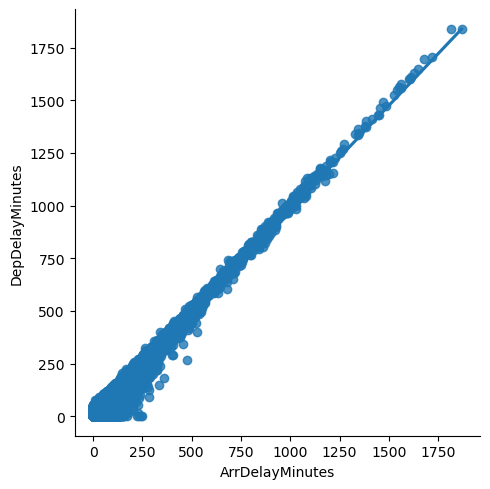

In [28]:
# Create a scatterplot for "DepDelayMinutes" and "ArrDelayMinutes" columns

sns.lmplot(x = 'ArrDelayMinutes', y = 'DepDelayMinutes', data = subset_flights)

## 4a. A nearly perfect positive correlation between departure delay and arrival delay minutes. There are some instances where arrival delays occuring while delays are not occurring, as evidenced by the solid blue between 0 and approximately 175 on the ArrDelayMinutes axis. Perhaps there are delays at the gate once the flight arrives that can be further explored by examining taxi times.

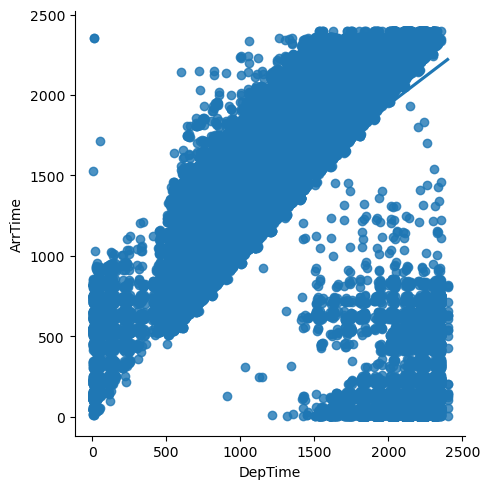

In [29]:
# Create a scatterplot for "DepTime" and "ArrTime" columns

sns.lmplot(x = 'DepTime', y = 'ArrTime', data = subset_flights)

## 4a. There is a nice strong correlation in departure time and arrival time until the 1430-1500 departure time window, indicating that when flights depart later they arrive early in the morning, as predicted in our initial observation of the correlation matrix!

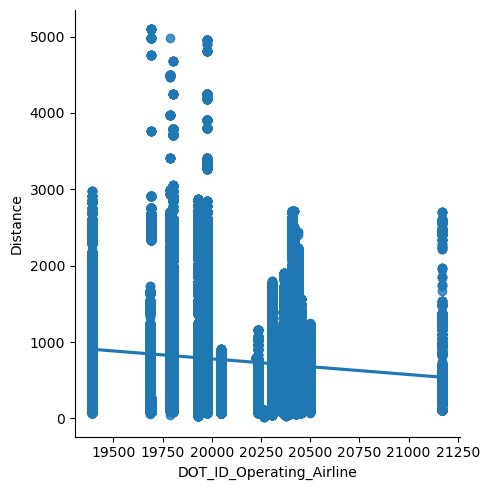

In [30]:
# Create a scatterplot for "DOT_ID_Operating_Airline" and "Distance" columns

sns.lmplot(x = 'DOT_ID_Operating_Airline', y = 'Distance', data = subset_flights)

## 4a. This plot effectively demonstrates the gap in the numerical sequence of unique ID's that the DOT assigns to airlines! Additionally, it is interesting that only airlines with a DOT ID less than 20000 have flights greater than 3000 miles.

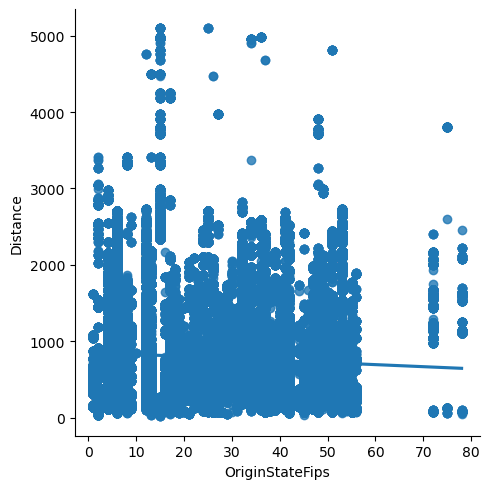

In [31]:
# Create a scatterplot for "OriginStateFips" and "Distance" columns

sns.lmplot(x = 'OriginStateFips', y = 'Distance', data = subset_flights)

## 4a. While this is a weak negative correlation, the finding is remarkable, as the Fips codes in the 11-15 range have longer flights. Upon further examination, the states with Fips codes in this range include the District of Columbia, Florida, and Hawaii. It makes sense that flights originating and departing from these states would have long distance flights due to their geography (as is the case for Florida and Hawaii), and due to the nations capital potentially attracting visitors from all of the other United States for say field trips or visiting national monuments, etc.

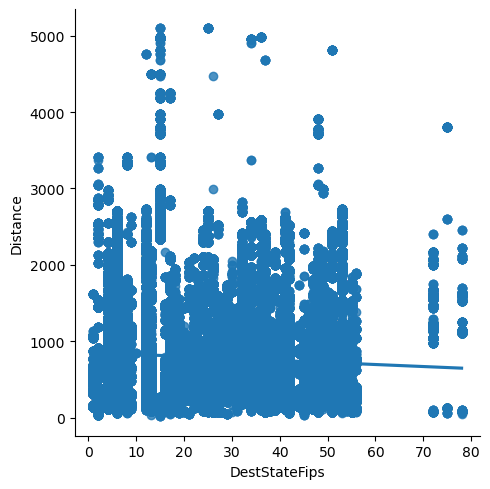

In [32]:
# Create a scatterplot for "DestStateFips" and "Distance" columns

sns.lmplot(x = 'DestStateFips', y = 'Distance', data = subset_flights)

## 4a. While this is a weak negative correlation, the finding is remarkable, as the Fips codes in the 11-15 range have longer flights. Upon further examination, the states with Fips codes in this range include the District of Columbia, Florida, and Hawaii. It makes sense that flights originating and departing from these states would have long distance flights due to their geography (as is the case for Florida and Hawaii), and due to the nations capital potentially attracting visitors from all of the other United States for say field trips or visiting national monuments, etc.

## 5. Create pair plot of entire data set.

In [33]:
# Create a Subset for the upcoming Pair Plot using the relevant data mentioned above

pairplot_subset = subset_flights[['ArrDelayMinutes', 'DepDelayMinutes', 'Distance', 'DOT_ID_Operating_Airline', 'DestStateFips', 'OriginStateFips']]

C:\Users\Josh Wattay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josh Wattay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josh Wattay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josh Wattay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

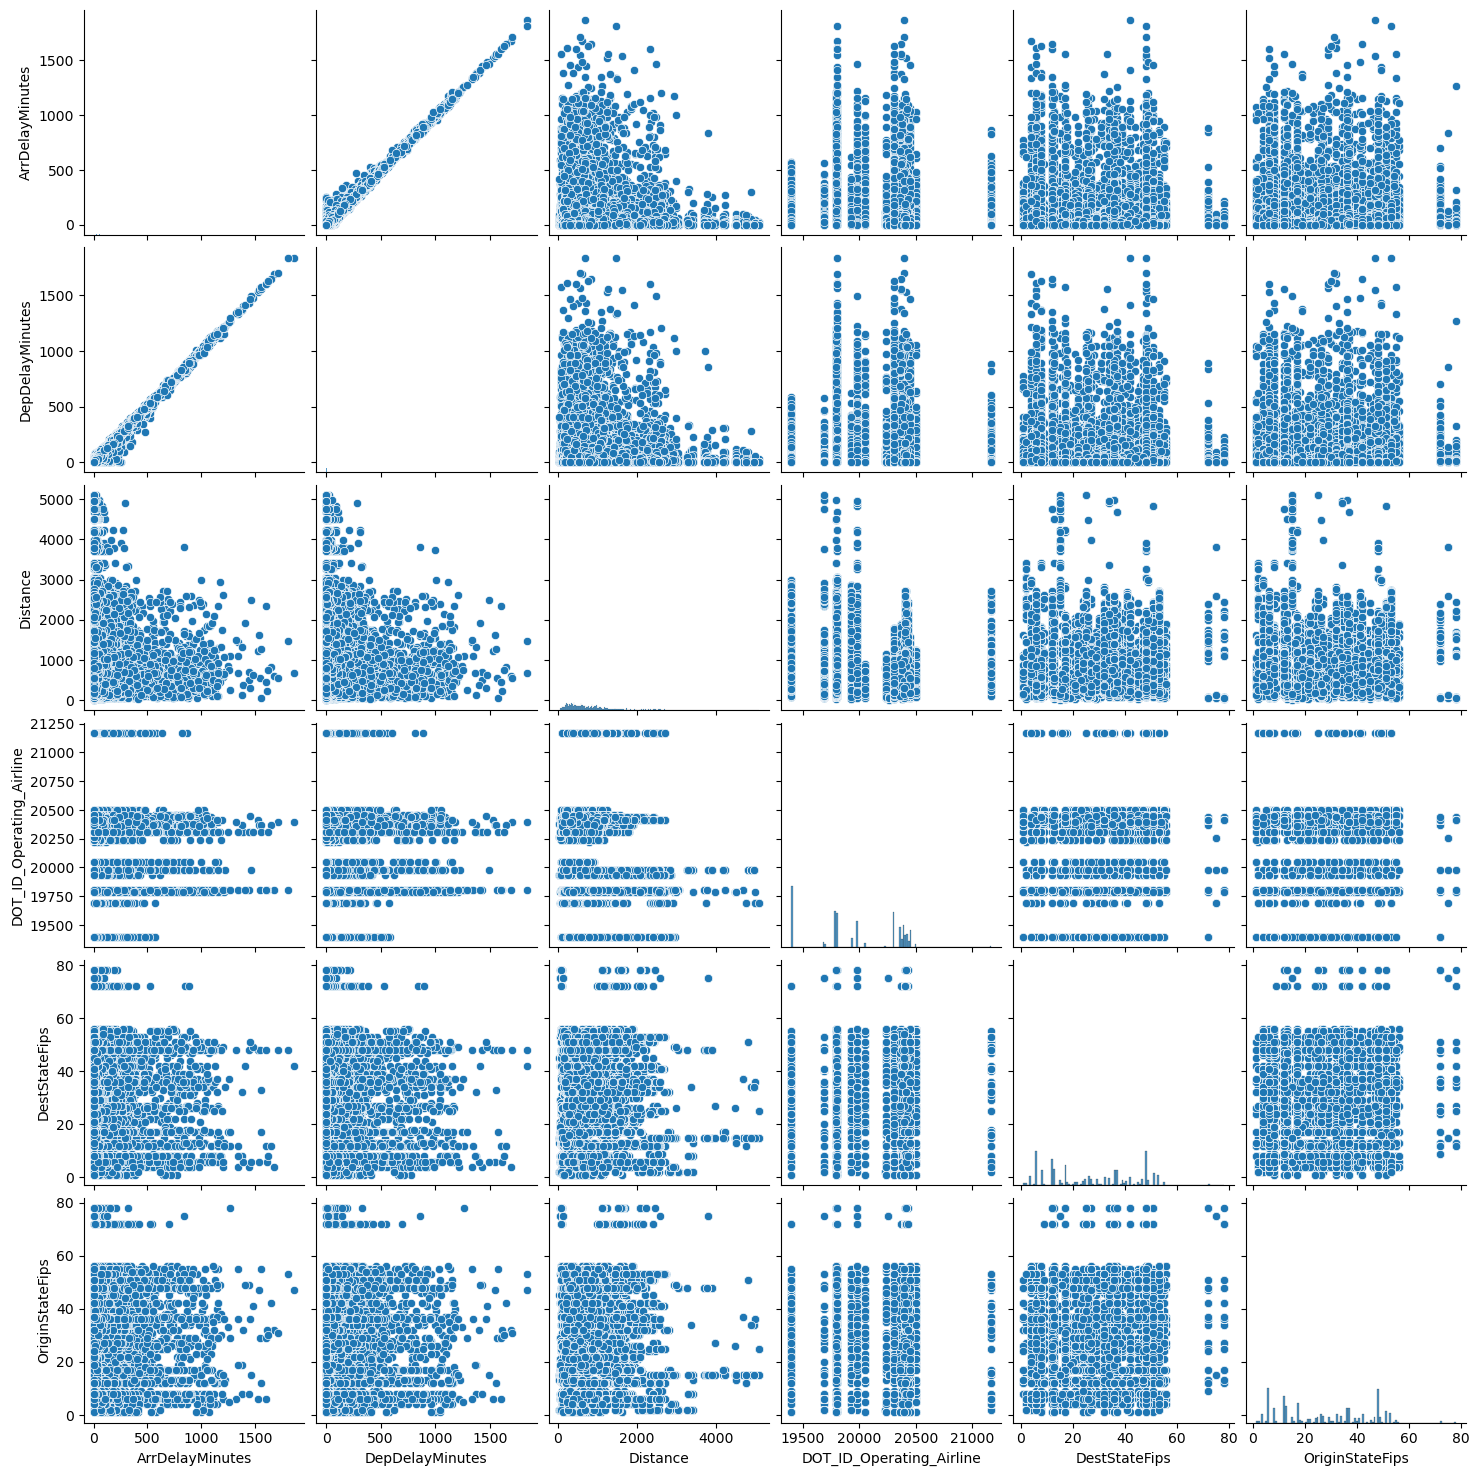

In [34]:
# Create the Pair Plot 

fpp = sns.pairplot(pairplot_subset)

## 5a. Comment on distribution of variables and note variables to explore further explaining why.

### I would like to explore ArrDelayMinutes further, as I would like to investigate why some flights arrive late even though they depart on time, as evidenced by the bulky distribution towards the bottom of the line of best fit. Furthermore, I did not anticipate it, but after seeing the distribution between Distance and departure and arrival delay in minutes. I anticipated that the longer distance flights would experience more delays. The data, on the otherhand, is suggesting that it is the other way around, with shorter distance flights experiencing more delays. Perhaps this is due to a higher volume of short distance flights and the more volume the more probable a delay will occur. Lastly, there is a nearly binomial distribution in the DestStateFips and ArrDelayMinutes and DepDelayMinutes. I assume the peaks of this distribution are California and New York, but I'd like to confirm with further analysis.

### Being able to identify insights into these questions will allow a more impactful and prescriptive analysis to stakeholders and improve awareness surrounding the underlying causes of flight delays and how Airlines can prepare and address said delays in the future.

## 6. Create categorical plot and interpret results.

C:\Users\Josh Wattay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Distance', ylabel='Count'>

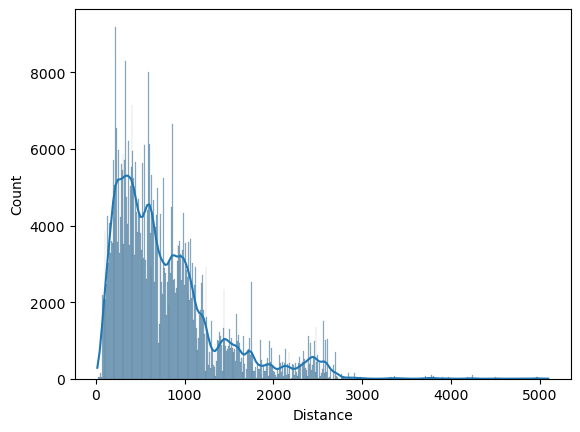

In [35]:
# Use a histogram to visualize and determine reasonable categories for the distances.

sns.histplot(subset_flights['Distance'], bins = 500, kde = True)

In [36]:
# create categories based on this output

subset_flights.loc[subset_flights['Distance'] < 500, 'Distance Category'] = 'Short Distance' #terms for short distance category

C:\Users\Josh Wattay\AppData\Local\Temp\ipykernel_7852\2240097404.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_flights.loc[subset_flights['Distance'] < 500, 'Distance Category'] = 'Short Distance' #terms for short distance category


In [39]:
subset_flights.loc[(subset_flights['Distance'] >= 500) & (subset_flights['Distance'] < 1000), 'Distance Category'] = 'Moderate Distance'

In [40]:
subset_flights.loc[subset_flights['Distance'] > 1000, 'Distance Category'] = 'Long Distance'

In [41]:
# Counts for Distance Category

subset_flights['Distance Category'].value_counts(dropna = False)

Distance Category
Short Distance       193189
Moderate Distance    176984
Long Distance        129822
NaN                       5
Name: count, dtype: int64

C:\Users\Josh Wattay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josh Wattay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Josh Wattay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Josh Wattay\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Creating legend with loc="best" can be slow with l

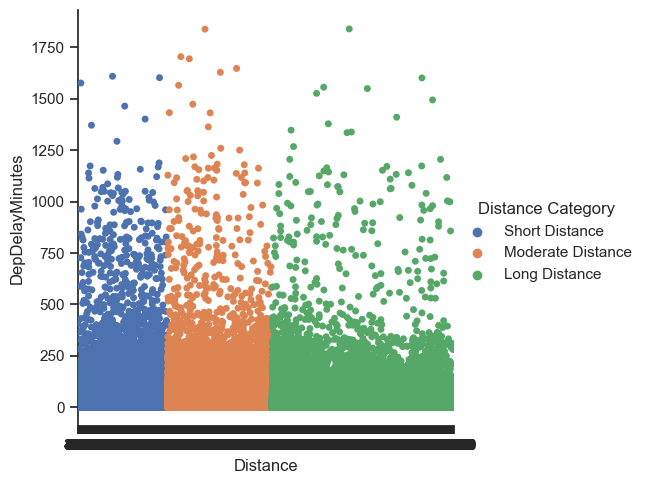

In [43]:
# Create categorical plot using the Distance categories created above

sns.set(style="ticks")
distcats = sns.catplot(x="Distance", y="DepDelayMinutes", hue="Distance Category", data=subset_flights)

### A vast majority of the domestic flights in the United States have a distance of 0-750 miles. There is a slight rebound in the count of flights of approximately 700 miles, following the peak count of flights at approximately 200 miles in distance. I would like to further explore why so many people are flying such a short distance as opposed to driving. A working theory is that many of these short flights are in fact connecting flights or one-way flights that passengers are booking to save money by purchasing multiple one-way flights instead of round trip flights.

## 7. Revisit questions previously defined and write answers based on exploration conducted thus far. Add new questions that arose during exploratory visual analysis.

### What are the trends in on-time performance for flights over these years? There is no notable change in the on-time performance for flights from 2018 to 2022 based on the near 0 correlation coefficient between Year and DepDelayMinutes and ArrDelayMinutes. 

### Which airports and airlines have the highest and lowest rates of delays? This needs to be explored further by a geospatial analysis with a chloropleth map.

### Are there regional differences in flight performance? There appear to be more delays in California and New York based on the Fips code correlation with DepDelayMinutes but this needs to be examined further to confirm.

### How do different airlines compare in terms of on-time performance, cancellation rates, and passenger volume? Airlines with a DOT ID between 19000 and 21000 have more delays than those with an ID below and above that range.

## 8. Define any hypotheses for future testing.

### Flights of shorter distance are more likely to be delayed.
### The longer a flight's departure is delayed, the longer the flight's arrival will be delayed.
### Airlines with a DOT ID between 19000 and 21000 are more likely to have flights delayed compared to those airlines with a DOT ID outside of this range.
### Flights originating in the Southeast during the Summer months are more likely to be delayed due to weather.
### Flights originating in the Northeast and Midwest during the Winter months are more likely to be delayed due to weather.
### Less flights were delayed during 2020 due to fewer passengers and decreased domestic flight demand in the United States.